# Setup

In [1]:
# python standard
import os

# third party
import numpy as np
import pandas as pd
import seaborn as sns
import tzlocal
from pylab import rcParams
from matplotlib import pyplot
%matplotlib inline
import rpy2.robjects as robjects

%load_ext rpy2.ipython

In [2]:
rcParams['figure.figsize'] = 22, 7
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['axes.formatter.useoffset'] = False

# Files/paths
# msg_data_path = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/'
# lib_path = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/physical_map/lib'

# msg_run = os.path.join(msg_data_path, '20151111')
# combine_dir = os.path.join(msg_run, 'combine-difffac_0.1')
# rqtl_dir = os.path.join(msg_run, 'rqtl', 'EPM')

# # Files for rqtl
# cross_path = os.path.join(rqtl_dir, 'cross_EPM_newChromNames_2017.RData')
# # Files for read.cross.msg
# read_cross_file1 = os.path.join(combine_dir, 'ancestry-probs-par2.tsv.sorted.csv')
# read_cross_file2 = os.path.join(combine_dir, 'ancestry-probs-par2.tsv.sorted.pulled.converted.thinned.f2_rqtl')
# EPM_pheno_file = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/EPM/results/rqtl_epm_pheno_file.csv'
# ancfile_par1 = os.path.join(combine_dir, 'ancestry-probs-par1.tsv.sorted.pulled.converted.thinned.f2_rqtl')

cross_path = 'cross_EPM_newChromNames_2017.RData'

# Libraries
# r_package_path = os.path.join(lib_path, 'Rpackages')

# Import R Data

In [3]:
%%R
# To load qtl you must have the qtl library installed in R
library(qtl)

In [4]:
%%R -i cross_path
load(cross_path)

In [5]:
%%R
# Current Phenotypes
print(names(cross$pheno))

 [1] "id"                      "sex"                    
 [3] "frac_in_closedAndMiddle" "frac_in_closedArms"     
 [5] "frac_in_middle"          "frac_in_openArms"       
 [7] "entries_to_closed"       "entries_to_open"        
 [9] "distance_in_closed"      "distance_in_open"       
[11] "speed_in_closed"         "speed_in_open"          
[13] "entries_o_c_ratio"       "distance_o_c_ratio"     
[15] "speed_o_c_ratio"         "total_frames"           
[17] "tested_more_than_once"   "pgm"                    
[19] "frac_entries_to_open"    "frac_distance_in_open"  
[21] "log_temp_pheno"         


# Merge R Data with New Features

In [6]:
# Import original data into python
miceDF = robjects.r('cross$pheno')
miceDF = robjects.pandas2ri.ri2py_dataframe(miceDF)

#extract ids
def extractNumber(mouseIDString):
    indexStart = 5
    indexEnd = mouseIDString.find('_')
    return mouseIDString[indexStart:indexEnd]

miceDF['mouseID'] = miceDF['id'].apply(lambda mouseIDString: extractNumber(mouseIDString))

# import new features
newFeaturesPath = 'all_the_data.csv'
newFeaturesDF = pd.read_csv(newFeaturesPath, index_col=0)
newFeaturesDF.set_index('mouse_details_mouseID', inplace=False)

# Drop duplicate mouse IDs in new features
newFeaturesDF = newFeaturesDF.drop_duplicates(subset='mouse_details_mouseID')

# merge new features into previous features
mergedDF = pd.merge(
    miceDF, 
    newFeaturesDF, 
    left_on='mouseID', 
    right_on='mouse_details_mouseID',
    how='left'
)

cross_R_DF = robjects.pandas2ri.py2ri(mergedDF)

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "id". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "sex". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "frac_in_closedAnd

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_CL_left_average_speed". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_CL_left_average_speed_active". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_CL_left_median_speed". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2r

In [7]:
goodFeatures = [
    'fraction_in_arms_closed',
    'fraction_in_arms_middle',
    'mouse_length',
    'peeking_average_length_total',
    'rest_fraction_all_arms',
    'rest_fraction_closed_arms',
    'rest_fraction_open_arms',
    'turning_preferences_fraction_back',
    'turning_preferences_fraction_left',
    'turning_preferences_fraction_right',
    'turning_preferences_fraction_straight',
    'velocity_closed_towards_outside_average_speed_active',
    'velocity_open_towards_middle_average_speed_active',
    'velocity_open_towards_outside_average_speed_active'
]

In [9]:
%%R -i goodFeatures,cross_R_DF
goodFeatures <- goodFeatures
for (feature in goodFeatures){
    cross$pheno[,feature] <- as.numeric(cross_R_DF[,feature])
}

/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [10]:
%%R 
print(summary(cross))

    F2 intercross

    No. individuals:    1571 

    No. phenotypes:     35 
    Percent phenotyped: 81.6 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 
        X chr:          X 

    Total markers:      51739 
    No. markers:        3680 2706 3346 3181 3273 2538 2402 2543 2012 1806 2183 
                        1950 1134 1704 1529 1786 938 1543 1309 1853 2228 1588 
                        1647 2860 
    Percent genotyped:  99.1 
    Genotypes (%):    
          Autosomes:        AA:23.6      AB:51.6      BB:24.8  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:21.3     ABf:19.7     ABr:6.2       BB:0.4  
                            AY:24.1      BY:28.3 


## QTL scans to see if sex makes significant impact on QTL

QTL scans of males and females combined, using sex as an interactive covariate to detect QTL that have different effects on the two sexes.

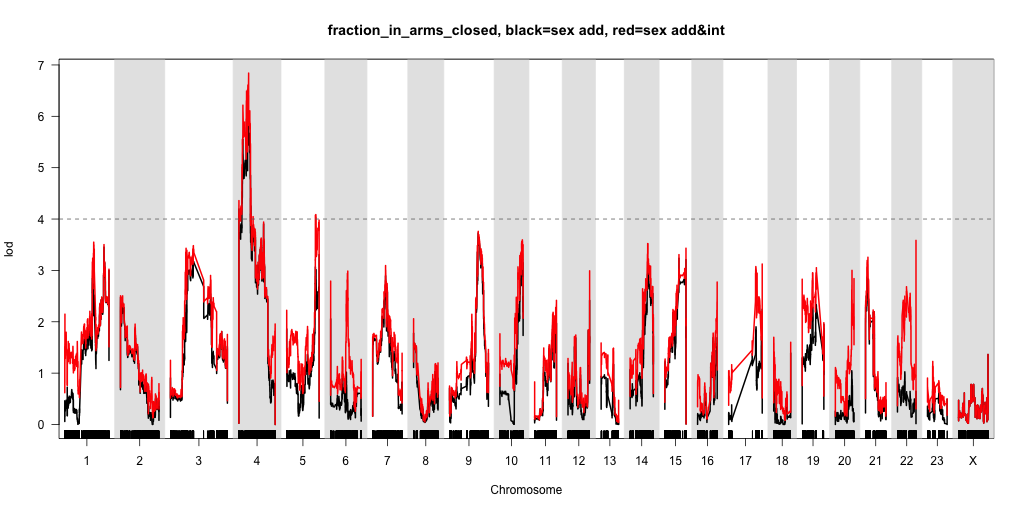

In [17]:
%%R -w 1024 -h 512
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
out.a <- scanone(cross, pheno='fraction_in_arms_closed', model='normal',method='hk', addcovar=sex)
out.i <- scanone(cross, pheno='fraction_in_arms_closed', model="normal", method="hk", addcovar=sex, intcovar=sex)
plot(out.a, out.i,
     bandcol = "gray90",
     col=c('black','red'),
     main="fraction_in_arms_closed, black=sex add, red=sex add&int",
     gap=50000000,
     lty=1)

# Plot thresholds
thresh <- 4
abline(h=thresh, lty=2, col="dimgray")        

In [30]:
%%R -w 1024 -h 512
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
for (feature in goodFeatures) {
    # Replace 0's in phenotype with the minimum observed for that phenotype before taking the log
    temp_pheno <- cross$pheno[[feature]]
    smallest <- min(temp_pheno[which(temp_pheno>0)])
    temp_pheno[temp_pheno==0] <- smallest
    cross$pheno$log_temp_pheno <- log(temp_pheno)
    
    out.a <- scanone(cross, pheno="log_temp_pheno", model="normal", method="hk", addcovar=sex)
    out.i <- scanone(cross, pheno="log_temp_pheno", model="normal", method="hk", addcovar=sex, intcovar=sex)
    png(paste('Species_and_Sexes_results/', feature, '.png', sep=""), width=1024)
    main <- bquote(.(feature) ~ "normal hk log, sex covar, out.i - out.a")
    plot(out.i-out.a,
         main=main,
         col=c("black"),
         incl.markers=FALSE,
         bandcol='gray90',
         gap=50000000,
         lty=1)

    dev.off()
}

#### Plot results of scans with sex just as additive covariate

In [38]:
%%R -w 1024 -h 512
#sex <- as.numeric(pull.pheno(cross, "sex") == "M")

for (feature in goodFeatures) {
    # Replace 0's in phenotype with the minimum observed for that phenotype before taking the log
    temp_pheno <- cross$pheno[[feature]]
    smallest <- min(temp_pheno[which(temp_pheno>0)])
    temp_pheno[temp_pheno==0] <- smallest
    cross$pheno$log_temp_pheno <- log(temp_pheno)
    
    out.a <- scanone(cross, pheno=feature, model="normal", method="hk", addcovar=sex)
    png(paste('Species_and_Sexes_results/', feature, '_addonly.png', sep=""), width=1024)
    main <- bquote(.(feature) ~ "normal hk, sex addcover only")
    plot(out.a,
         main=main,
         col=c("black"),
         incl.markers=FALSE,
         bandcol='gray90',
         gap=50000000,
         lty=1)
    
    # Plot thresholds
    #thresh <- 4
    #abline(h=thresh, lty=2, col="dimgray")  
    
    dev.off()
}

In [40]:
%%R -w 1024 -h 512
#sex <- as.numeric(pull.pheno(cross, "sex") == "M")
for (feature in goodFeatures) {
    # Replace 0's in phenotype with the minimum observed for that phenotype before taking the log
    temp_pheno <- cross$pheno[[feature]]
    smallest <- min(temp_pheno[which(temp_pheno>0)])
    temp_pheno[temp_pheno==0] <- smallest
    cross$pheno$log_temp_pheno <- log(temp_pheno)
    
    out.a <- scanone(cross, pheno=feature, model="normal", method='hk', addcovar=sex)
    out.i <- scanone(cross, pheno=feature, model="normal", method="hk", addcovar=sex, intcovar=sex)
    out.alog <- scanone(cross, pheno="log_temp_pheno", model="normal", method="hk", addcovar=sex)
    out.ilog <- scanone(cross, pheno="log_temp_pheno", model="normal", method="hk", addcovar=sex, intcovar=sex)
    png(paste('Species_and_Sexes_results/', feature, '_log.png', sep=""), width=1024)
    main <- bquote(.(feature) ~ "black=sex cover, red=sex cover log")
    plot(out.i-out.a,out.ilog-out.alog,
         main=main,
         col=c('black','red'),
         incl.markers=FALSE,
         bandcol = "gray90",
         gap=50000000,
         lty=1)
    
    dev.off()
}

### plot four scans together

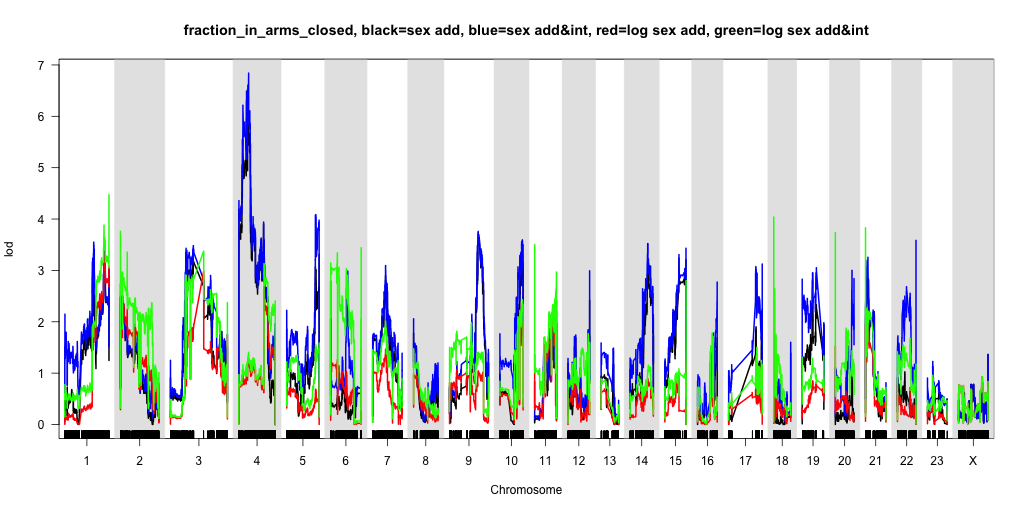

In [14]:
%%R -w 1024 -h 512
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
out.a <- scanone(cross,pheno='fraction_in_arms_closed',model='normal',method='hk', addcovar=sex)
out.i <- scanone(cross, pheno='fraction_in_arms_closed', model="normal", method="hk", addcovar=sex, intcovar=sex)
out.alog <- scanone(cross, pheno=log(cross$pheno$'fraction_in_arms_closed'), model="normal", method="hk", addcovar=sex)
out.ilog <- scanone(cross, pheno=log(cross$pheno$'fraction_in_arms_closed'), model="normal", method="hk", addcovar=sex, intcovar=sex)
plot(out.a,out.i,out.alog,
     bandcol = "gray90",
     col=c('black','blue','red'),
     main="fraction_in_arms_closed, black=sex add, blue=sex add&int, red=log sex add, green=log sex add&int",
     gap=50000000,
     lty=1)
plot(out.ilog,
     col='green',
     gap=50000000,
     lty=1,
     add=TRUE)